In [3]:
import pandas as pd
df = pd.read_csv(
  "/home/dohee/kaggle/london/input/london_merged.csv",
  parse_dates=['timestamp'],
  index_col="timestamp"
)

timestamp — timestamp field for grouping the data </br>

cnt — the count of a new bike shares

t1 — real temperature in C

t2 — temperature in C “feels like”

hum — humidity in percentage

wind_speed — wind speed in km/h

weather_code — category of the weather

is_holiday — boolean field — 1 holiday / 0 non holiday

is_weekend — boolean field — 1 if the day is weekend

season — category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

In [4]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [5]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [10]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1


In [13]:
from matplotlib import pyplot as plt

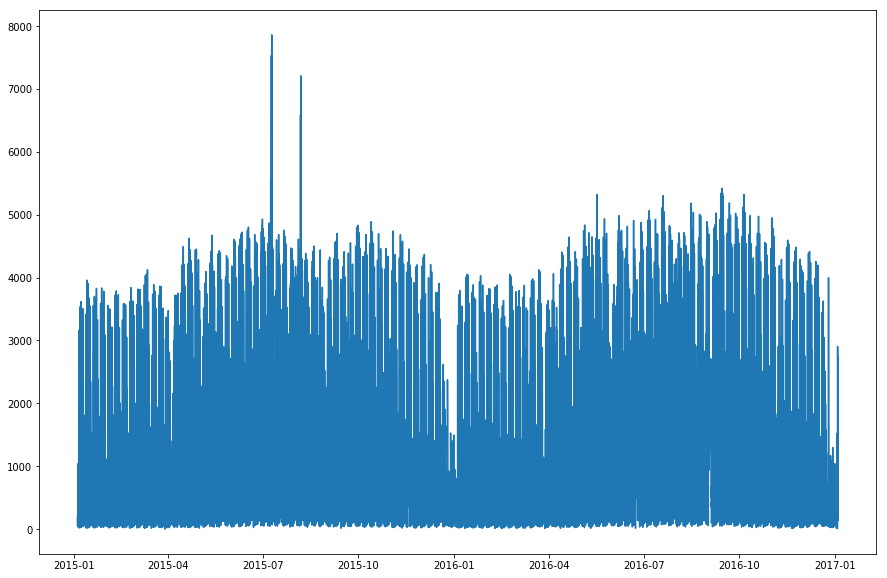

In [16]:
plt.figure(figsize=(15,10))
plt.plot(df.cnt)

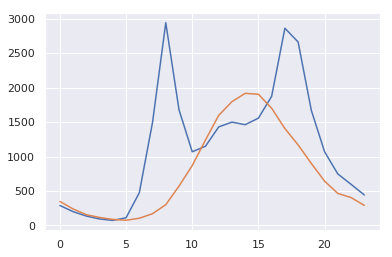

In [119]:
import seaborn as sns
sns.set()

# 휴일 & 시간별
plt.plot(df[df['is_holiday']==0].groupby(['hour'])['cnt'].mean())
plt.plot(df[df['is_holiday']==1].groupby(['hour'])['cnt'].mean())

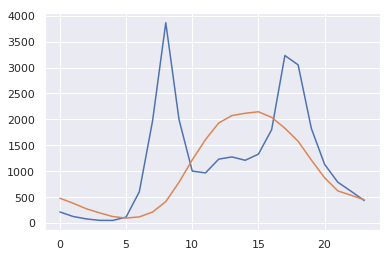

In [120]:
# 주말 & 시간별
plt.plot(df[df['is_weekend']==0].groupby(['hour'])['cnt'].mean())
plt.plot(df[df['is_weekend']==1].groupby(['hour'])['cnt'].mean())

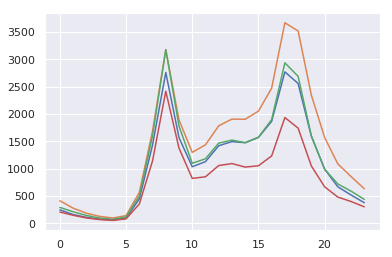

In [121]:
# 계절 & 시간별
plt.plot(df[df['season']==0].groupby(['hour'])['cnt'].mean())
plt.plot(df[df['season']==1].groupby(['hour'])['cnt'].mean())
plt.plot(df[df['season']==2].groupby(['hour'])['cnt'].mean())
plt.plot(df[df['season']==3].groupby(['hour'])['cnt'].mean())

<BarContainer object of 4 artists>

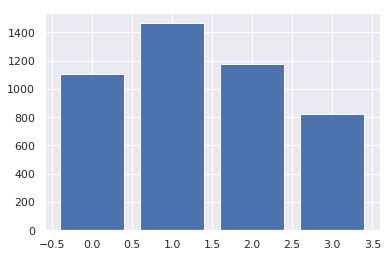

In [117]:
# 계절별
plt.bar(df.groupby('season')['cnt'].mean().index,df.groupby('season')['cnt'].mean())

<BarContainer object of 31 artists>

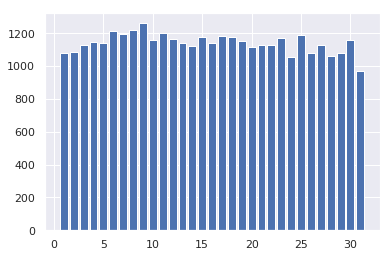

In [116]:
# 일별
plt.bar(df.groupby('day_of_month')['cnt'].mean().index,df.groupby('day_of_month')['cnt'].mean())

<BarContainer object of 7 artists>

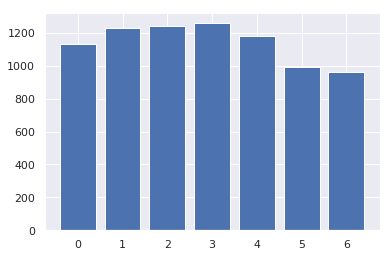

In [114]:
# 요일별
plt.bar(df.groupby('day_of_week')['cnt'].mean().index,df.groupby('day_of_week')['cnt'].mean())

<BarContainer object of 12 artists>

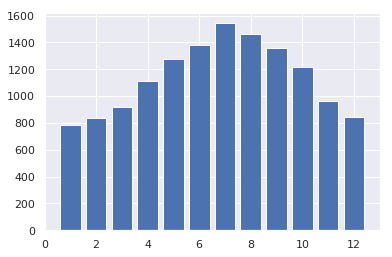

In [113]:
# 월별
plt.bar(df.groupby('month')['cnt'].mean().index,df.groupby('month')['cnt'].mean())

In [122]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [124]:
from sklearn.preprocessing import MinMaxScaler
RobustScaler = MinMaxScaler

In [125]:
f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())

train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)

test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/home/dohee/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/dohee/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [127]:
cnt_transformer = RobustScaler()

cnt_transformer = cnt_transformer.fit(train[['cnt']])

train['cnt'] = cnt_transformer.transform(train[['cnt']])

test['cnt'] = cnt_transformer.transform(test[['cnt']])

/home/dohee/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/dohee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/dohee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [128]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [131]:
import numpy as np

time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15662, 10, 13) (15662,)


In [135]:
import keras

model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.


In [136]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Train on 14095 samples, validate on 1567 samples
Epoch 1/30
14095/14095 [==============================] - 7s 495us/step - loss: 0.0544 - val_loss: 0.0155
Epoch 2/30
14095/14095 [==============================] - 6s 434us/step - loss: 0.0122 - val_loss: 0.0100
Epoch 3/30
14095/14095 [==============================] - 6s 405us/step - loss: 0.0077 - val_loss: 0.0061
Epoch 4/30
14095/14095 [==============================] - 6s 412us/step - loss: 0.0053 - val_loss: 0.0042
Epoch 5/30
14095/14095 [==============================] - 6s 409us/step - loss: 0.0041 - val_loss: 0.0047
Epoch 6/30
14095/14095 [==============================] - 6s 396us/step - loss: 0.0033 - val_loss: 0.0036
Epoch 7/30
14095/14095 [==============================] - 6s 420us/step - loss: 0.0030 - val_loss: 0.0035
Epoch 8/30
14095/14095 [==============================] - 6s 439us/step - loss: 0.0024 - val_loss: 0.0027
Epoch 9/30
14095/14095 [==============================] - 6s 458us/step - loss: 0.0022 - val_loss: 0.00

In [141]:
hist = history

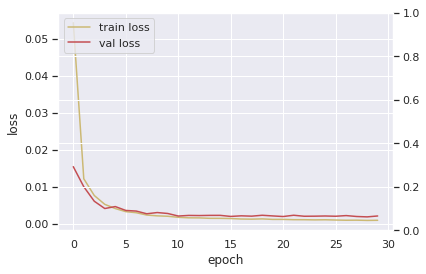

In [143]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

#acc_ax.plot(hist.history['acc'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
#acc_ax.set_ylabel('accuracy')
#acc_ax.legend(loc='upper left')

plt.show()

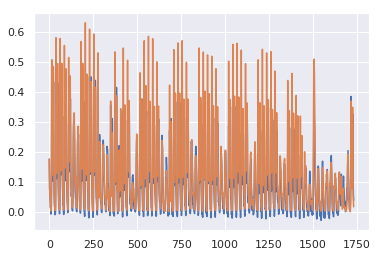

In [149]:
preds = model.predict(X_test)
plt.plot(preds)
plt.plot(y_test)